In [139]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


We are using a housing price dataset sourced from Bay Area Home Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015. 

In [140]:
df = pd.read_csv('./bay_area_zillow.csv')

In [141]:
# TODO: make this come from two datadots (need to resolve dotscience issue with copying into datadots first)
# inputs = [pd.read_csv('./agent1/bay_area_zillow_agent1.csv'), pd.read_csv('./agent2/bay_area_zillow_agent1.csv')]
# dff = pd.concat(f for f in inputs)

In [142]:
# randomise my dataframe rows to remove any ordering in the data
df = df.sample(frac=1).reset_index(drop=True)


In [143]:
df.describe()

,Unnamed: 0,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,9171.729214,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,4921.941074,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,9.400877,7.800741e+07
min,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,5039.750000,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,9198.500000,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,13374.750000,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [144]:
# drop unneeded columns
df.drop(df.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)


In [145]:
# check none of our data is null or NaN

df.isnull().any()

address          False
bathrooms        False
bedrooms         False
finishedsqft     False
lastsolddate     False
lastsoldprice    False
latitude         False
longitude        False
neighborhood     False
totalrooms       False
usecode          False
yearbuilt        False
zindexvalue      False
dtype: bool

In [146]:
df.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000


We hypothesise that `finishedsqft`, `bathrooms` and `bedrooms` are positively correlated with `lastsoldprice`. Let's plot these to see.

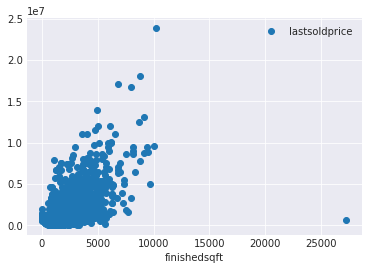

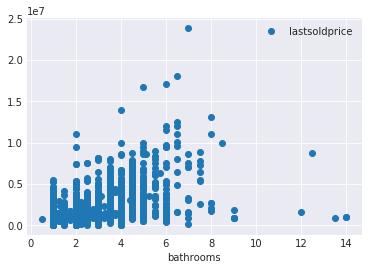

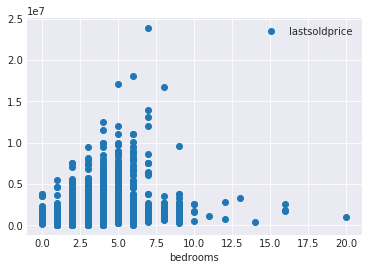

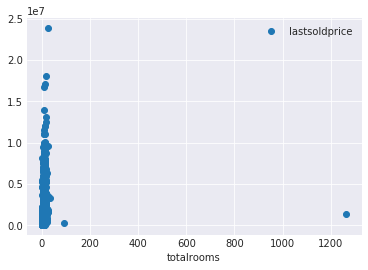

In [147]:
df.plot(x='finishedsqft', y='lastsoldprice', style='o')
df.plot(x='bathrooms', y='lastsoldprice', style='o')
df.plot(x='bedrooms', y='lastsoldprice', style='o')
df.plot(x='totalrooms', y='lastsoldprice', style='o')

Now let's perform a linear regression on those features to model `lastsoldprice`

In [148]:
X = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms']]
Y = df['lastsoldprice']

These are our features:

In [149]:
X.head()

,bathrooms,bedrooms,finishedsqft,totalrooms
0,1.5,1.0,1218.0,3.0
1,1.0,2.0,1035.0,5.0
2,1.0,2.0,755.0,4.0
3,3.5,4.0,2413.0,6.0
4,3.0,3.0,2003.0,7.0


In [150]:

# Split data into test and training set. Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [151]:
y_pred = regressor.predict(X_test)
print('Linear Regression coefficient of determination (R squared): %.4f' % regressor.score(X_test, y_test))

Linear Regression coefficient of determination (R squared): 0.4518


In [152]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 788410.0741
